# CESAR SCHOOL 2018.1/5: EQUIPE B (COI)

## Aquisição dos Dados

A fonte desta base de dados é o Portal de Atendimento da Prefeitura de São Paulo: **SP156**. O portal atende cerca de 24 mil ligações por dia, com 91% delas efetivamente atendidas e 90%, em até 15 segundos, com uma duração média de 3 minutos por ligação. A base contém dois tipos dados: gerais e avaliação. As definições detalhadas de cada coluna presente para cada um dos tipos de dados, bem como um infográfico que representa alguns desses dados visualmente, podem ser encontradas [aqui](https://github.com/lcbm/cassandra/tree/master/data/SP156). A base de dados foi adquirida por meio do próprio portal de dados abertos da Prefeitura de São Paulo, em formato CSV (comma-separated values, ou dados separados por vírgula). 

## Carregamento da Base de Dados

In [ ]:
import pandas as pd
import numpy as np

In [2]:
data = [
    'data/SP156/dados-gerais-ligacoes-sp156-2o-sem-2019.csv',
    'data/SP156/dados-gerais-ligacoes-sp156-1o-sem-2019.csv',
    'data/SP156/dados-gerais-ligacoes-sp156-1o-sem-2020.csv',
]

df = pd.concat(map(lambda file: pd.read_csv(file), data))

## Exploração dos Dados

In [3]:
df

,Data,Quantidade de ligacoes entrantes,Quantidade de ligacoes atendidas,Quantidade de ligacoes abandonadas,Tempo Medio de Atendimento,Tempo Medio de Espera,Quantidade de ligacoes atendidas em ate 15 segundos,Quantidade de ligacoes atendidas apos 15 segundos,Nivel de servico - ate 15 segundos (%),indice de ligacoes abandonadas em ate 15 segundos (%)
0,01/07/2019,25559,22463,3089,00:04:00,00:00:29,17768,4695,79.10,3.06
1,02/07/2019,25843,21447,3928,00:04:09,00:00:53,14190,7257,66.16,5.19
2,03/07/2019,22672,21375,1217,00:04:04,00:00:08,19695,1680,92.14,0.73
3,04/07/2019,19570,19232,252,00:03:57,00:00:01,18949,283,98.53,0.07
4,05/07/2019,22086,20809,298,00:03:47,00:00:02,20421,388,98.14,0.16
5,06/07/2019,9471,8489,982,00:04:08,00:00:35,7449,1040,87.75,7.37
6,07/07/2019,6273,5272,1001,00:04:13,00:01:12,4349,923,82.49,12.47
7,08/07/2019,20656,20469,187,00:03:37,00:00:04,20255,214,98.95,0.54
8,09/07/2019,8846,8772,71,00:03:45,00:00:02,8635,137,98.44,0.18
9,10/07/2019,24694,23339,1216,00:03:59,00:00:08,21672,1667,92.86,0.72


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 0 to 90
Data columns (total 10 columns):
Data                                                     456 non-null object
Quantidade de ligacoes entrantes                         456 non-null int64
Quantidade de ligacoes atendidas                         456 non-null int64
Quantidade de ligacoes abandonadas                       456 non-null int64
Tempo Medio de Atendimento                               456 non-null object
Tempo Medio de Espera                                    456 non-null object
Quantidade de ligacoes atendidas em ate 15 segundos      456 non-null int64
Quantidade de ligacoes atendidas apos 15 segundos        456 non-null int64
Nivel de servico -  ate 15 segundos (%)                  456 non-null float64
indice de ligacoes abandonadas em ate 15 segundos (%)    456 non-null float64
dtypes: float64(2), int64(5), object(3)
memory usage: 39.2+ KB


In [5]:
df.head()

,Data,Quantidade de ligacoes entrantes,Quantidade de ligacoes atendidas,Quantidade de ligacoes abandonadas,Tempo Medio de Atendimento,Tempo Medio de Espera,Quantidade de ligacoes atendidas em ate 15 segundos,Quantidade de ligacoes atendidas apos 15 segundos,Nivel de servico - ate 15 segundos (%),indice de ligacoes abandonadas em ate 15 segundos (%)
0,01/07/2019,25559,22463,3089,00:04:00,00:00:29,17768,4695,79.10,3.06
1,02/07/2019,25843,21447,3928,00:04:09,00:00:53,14190,7257,66.16,5.19
2,03/07/2019,22672,21375,1217,00:04:04,00:00:08,19695,1680,92.14,0.73
3,04/07/2019,19570,19232,252,00:03:57,00:00:01,18949,283,98.53,0.07
4,05/07/2019,22086,20809,298,00:03:47,00:00:02,20421,388,98.14,0.16


In [6]:
df.describe()

,Quantidade de ligacoes entrantes,Quantidade de ligacoes atendidas,Quantidade de ligacoes abandonadas,Quantidade de ligacoes atendidas em ate 15 segundos,Quantidade de ligacoes atendidas apos 15 segundos,Nivel de servico - ate 15 segundos (%),indice de ligacoes abandonadas em ate 15 segundos (%)
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,21133.276316,17909.712719,1563.697368,15933.486842,1976.225877,90.449232,3.034627
std,11031.618824,8357.443339,2109.176258,7343.746413,2430.039146,9.338576,3.424323
min,3635.000000,2721.000000,6.000000,2153.000000,1.000000,49.830000,0.000000
25%,8377.250000,7957.500000,239.500000,7763.750000,319.750000,86.890000,0.970000
50%,23808.000000,20804.500000,801.000000,17887.000000,1040.500000,93.300000,1.870000
75%,28938.000000,24188.250000,2161.000000,21610.500000,2619.000000,97.317500,3.830000
max,54436.000000,34481.000000,19916.000000,32047.000000,14124.000000,99.990000,30.140000


## Tratamento dos Dados

**Converter campos de data (tipo objeto) em segundos (tipo int)**

In [7]:
df_1 = pd.read_csv('data/SP156/dados-gerais-ligacoes-sp156-segundos.csv')
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 10 columns):
Data                                                     456 non-null object
Quantidade de ligacoes entrantes                         456 non-null int64
Quantidade de ligacoes atendidas                         456 non-null int64
Quantidade de ligacoes abandonadas                       456 non-null int64
Tempo Medio de Atendimento                               456 non-null int64
Tempo Medio de Espera                                    456 non-null int64
Quantidade de ligacoes atendidas em ate 15 segundos      456 non-null int64
Quantidade de ligacoes atendidas apos 15 segundos        456 non-null int64
Nivel de servico -  ate 15 segundos (%)                  456 non-null float64
indice de ligacoes abandonadas em ate 15 segundos (%)    456 non-null float64
dtypes: float64(2), int64(7), object(1)
memory usage: 35.8+ KB


**Dropamos _'Data'_ por não ter relevância no nosso contexto.**

In [8]:
df_2 = df_1
df_2 = df_2.drop(['Data'], axis=1)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 9 columns):
Quantidade de ligacoes entrantes                         456 non-null int64
Quantidade de ligacoes atendidas                         456 non-null int64
Quantidade de ligacoes abandonadas                       456 non-null int64
Tempo Medio de Atendimento                               456 non-null int64
Tempo Medio de Espera                                    456 non-null int64
Quantidade de ligacoes atendidas em ate 15 segundos      456 non-null int64
Quantidade de ligacoes atendidas apos 15 segundos        456 non-null int64
Nivel de servico -  ate 15 segundos (%)                  456 non-null float64
indice de ligacoes abandonadas em ate 15 segundos (%)    456 non-null float64
dtypes: float64(2), int64(7)
memory usage: 32.2 KB


## Visualização dos Dados

In [9]:
import seaborn as sns 
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

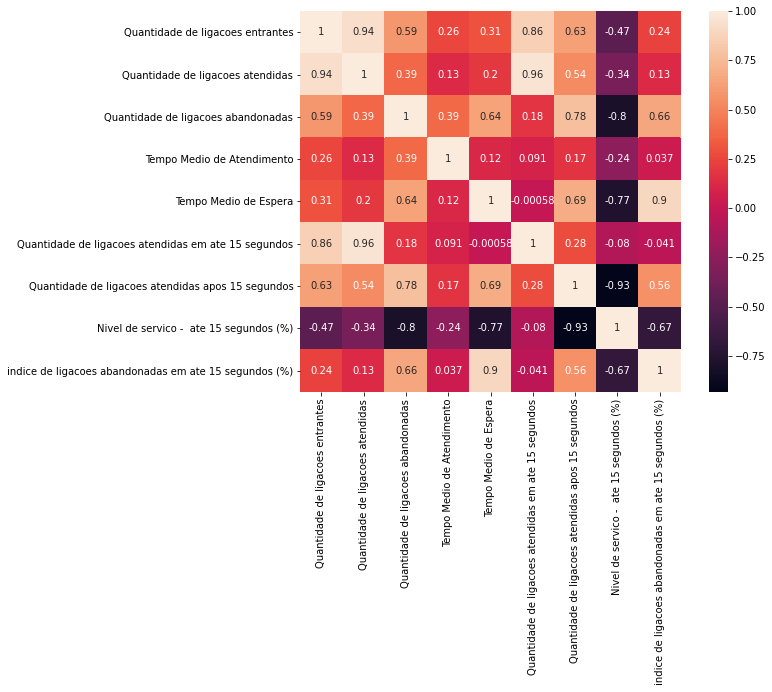

In [83]:
# correlation matrix
plt.figure(figsize=(10,7))
sns.heatmap(df_2.corr(),
            annot=True,
            square=True)

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  
/opt/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.g

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e6973ab38>,
      dtype=object)

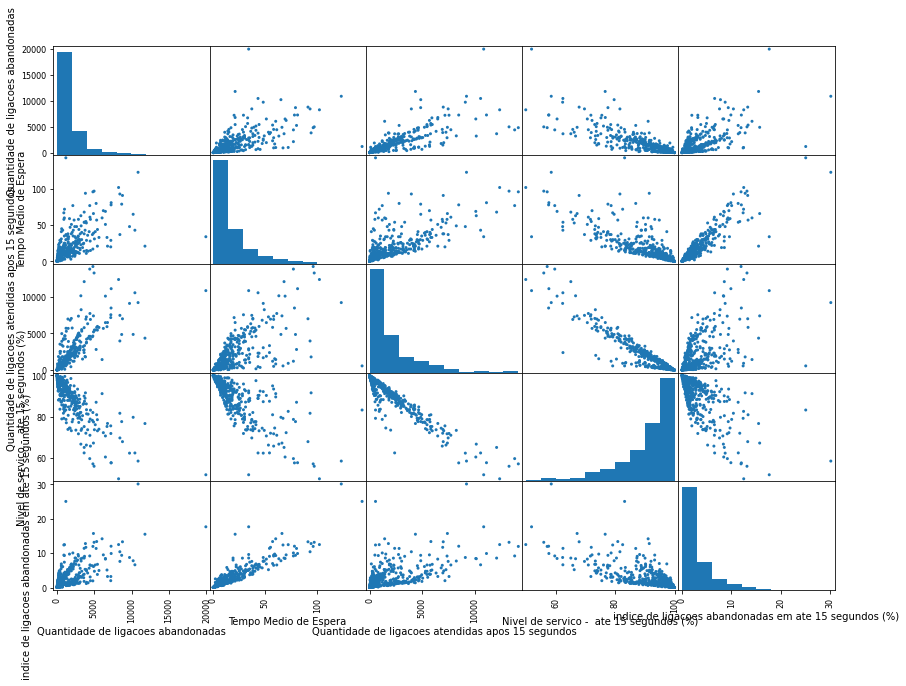

In [87]:
fig, ax = plt.subplots(figsize=(14,10))
df_3 = df_2.drop(['Quantidade de ligacoes atendidas', 'Tempo Medio de Atendimento', 
                'Quantidade de ligacoes atendidas em ate 15 segundos', 'Quantidade de ligacoes entrantes'], axis=1)
tdf_3 = df_2.drop(['Quantidade de ligacoes atendidas', 'Tempo Medio de Atendimento', 'Quantidade de ligacoes atendidas em ate 15 segundos', 
                'Quantidade de ligacoes entrantes'], axis=1)
scatter_matrix(df_3, alpha=1, ax=ax)

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  
/opt/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.g

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e68c6ba90>,
      dtype=object)

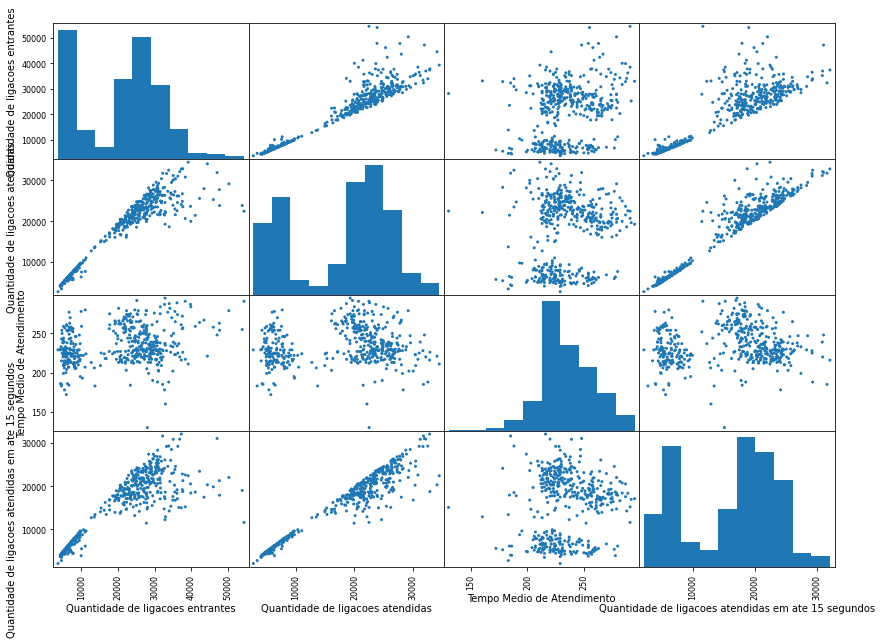

In [80]:
fig, ax = plt.subplots(figsize=(14,10))
df_4 = df_2.drop(['Quantidade de ligacoes abandonadas', 'Tempo Medio de Espera', 'Quantidade de ligacoes atendidas apos 15 segundos', 
                'Nivel de servico -  ate 15 segundos (%)', 'indice de ligacoes abandonadas em ate 15 segundos (%)'], axis=1)
tdf_4 = df_2.drop(['Quantidade de ligacoes abandonadas', 'Tempo Medio de Espera', 'Quantidade de ligacoes atendidas apos 15 segundos', 
                'Nivel de servico -  ate 15 segundos (%)', 'indice de ligacoes abandonadas em ate 15 segundos (%)'], axis=1)
scatter_matrix(df_4, alpha=1, ax=ax)

**Definição das 'features' e 'target'**

In [12]:
target   = 'Quantidade de ligacoes abandonadas'
features = df_2.columns
features

Index(['Quantidade de ligacoes entrantes', 'Quantidade de ligacoes atendidas',
       'Quantidade de ligacoes abandonadas', 'Tempo Medio de Atendimento',
       'Tempo Medio de Espera',
       'Quantidade de ligacoes atendidas em ate 15 segundos',
       'Quantidade de ligacoes atendidas apos 15 segundos',
       'Nivel de servico -  ate 15 segundos (%)',
       'indice de ligacoes abandonadas em ate 15 segundos (%)'],
      dtype='object')

**Divisão da base de dados**

In [13]:
from sklearn.model_selection import train_test_split

y = df_2.loc[:, features == target]
X = df_2.loc[:, features != target]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    shuffle=False)

## Aplicação dos Modelos

In [14]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit, RandomizedSearchCV, GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor


import json
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, roc_auc_score

**Validação cruzada em series temporais**

In [15]:
tscv = TimeSeriesSplit(max_train_size=None, n_splits=10)

### kNN

**Criação do pipeline**

In [16]:
knn_pipeline = Pipeline([('scaler', StandardScaler()),
                         ('KNN', KNeighborsRegressor())])

**Ajuste de Hiperparâmetro**

In [17]:
knn_rscv_hyperparameters = {'KNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 21, 23, 25],
                            'KNN__weights': ['uniform', 'distance'],
                            'KNN__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                            'KNN__leaf_size': [20, 30, 40, 60, 100, 150, 200, 400, 800, 1600],
                            'KNN__p': [1, 2, 3]}

knn_rscv = RandomizedSearchCV(knn_pipeline,
                              n_iter=100,
                              param_distributions=knn_rscv_hyperparameters,
                              cv=tscv,
                              scoring='neg_root_mean_squared_error',
                              n_jobs=-1)

In [18]:
knn_rscv_result = knn_rscv.fit(X_train, y_train)

print("Best Score: ", knn_rscv_result.best_score_)
print("Best Parameters:\n", json.dumps(knn_rscv_result.best_params_, indent=2))

Best Score:  -901.1047702445545
Best Parameters:
 {
  "KNN__weights": "distance",
  "KNN__p": 1,
  "KNN__n_neighbors": 3,
  "KNN__leaf_size": 800,
  "KNN__algorithm": "ball_tree"
}


In [19]:
knn_gscv_hyperparameters = {'KNN__n_neighbors': [1, 3, 5, 7, 9],
                            'KNN__weights': ['uniform', 'distance'],
                            'KNN__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                            'KNN__leaf_size': [10, 50, 100, 200, 400],
                            'KNN__p': [1, 2, 3]}

knn_gscv = GridSearchCV(knn_pipeline,
                        param_grid=knn_gscv_hyperparameters,
                        cv=tscv,
                        scoring='neg_root_mean_squared_error',
                        n_jobs=-1)

In [0]:
knn_gscv_result = knn_gscv.fit(X_train, y_train)

print("Best Score: ", knn_gscv_result.best_score_)
print("Best Parameters:\n", json.dumps(knn_gscv_result.best_params_, indent=2))

Best Score:  -901.1047702445543
Best Parameters:
 {
  "KNN__algorithm": "brute",
  "KNN__leaf_size": 10,
  "KNN__n_neighbors": 3,
  "KNN__p": 1,
  "KNN__weights": "distance"
}


**Aplicação do modelo**

In [21]:
knn_best_estimator = knn_gscv_result.best_estimator_
knn_best_estimator.fit(X_train, y_train)
knn_y_pred = knn_best_estimator.predict(X_test)
knn_y_pred

array([[1462.71636803],
       [ 810.12609465],
       [  60.86367753],
       [ 106.49418787],
       [1241.27253648],
       [1885.68310421],
       [2405.33920454],
       [3657.14864568],
       [3064.40231385],
       [  45.36043321],
       [  64.68114857],
       [2966.02682684],
       [6144.38513387],
       [4538.12534754],
       [3690.08657481],
       [1840.12497989],
       [ 384.7003275 ],
       [  95.51824729],
       [3677.00340859],
       [7491.70451437],
       [2251.11375832],
       [2005.77113226],
       [1608.60433043],
       [ 151.63331408],
       [  63.78040527],
       [2039.22114535],
       [3423.89260835],
       [1575.93157457],
       [2063.41024805],
       [ 232.0224923 ],
       [  65.81488403],
       [  62.40361689],
       [2202.35897246],
       [2211.79719058],
       [1672.05798057],
       [  39.96079934],
       [ 197.13619843],
       [  41.01142994],
       [  63.15288835],
       [2754.27180366],
       [4486.91039611],
       [2249.952

**Avaliação do Modelo**

Mean Absolute Error   : 617.18
Mean Squared Error    : 942450.33
Root Mean Square Error: 970.80
R-Squared             : 0.69


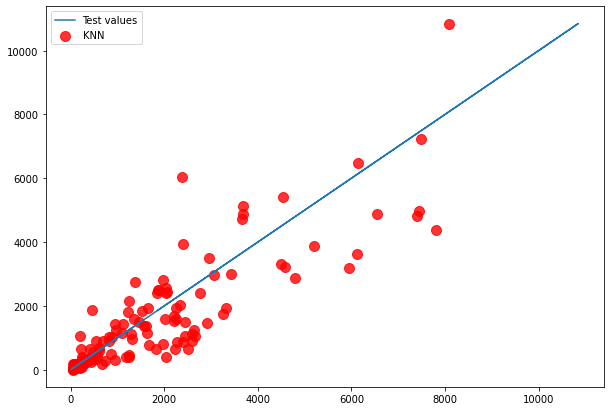

In [63]:
knn_mae    = mean_absolute_error(y_test, knn_y_pred)
knn_mse    = mean_squared_error(y_test, knn_y_pred)
knn_rmse   = np.sqrt(mean_squared_error(y_test, knn_y_pred))
knn_r_sqrd = r2_score(y_test, knn_y_pred)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
import numpy as np

# Dispersão entre y_test e knn_y_pred
plt.figure(figsize=(10,7))
plt.plot(y_test,y_test, label='Test values')
plt.scatter(knn_y_pred, y_test, c='red', label="KNN", s=100, alpha=0.8)
plt.legend()

print(f"Mean Absolute Error   : {knn_mae:.2f}")
print(f"Mean Squared Error    : {knn_mse:.2f}")
print(f"Root Mean Square Error: {knn_rmse:.2f}")
print(f"R-Squared             : {knn_r_sqrd:.2f}")

### Random Forests

**Criação do Pipeline**

In [23]:
rfr_pipeline = Pipeline([('scaler', StandardScaler()),
                         ('RFR', RandomForestRegressor(random_state=42))])

**Ajuste de Hiperparâmetro**

In [24]:
rfr_rscv_hyperparameters = {'RFR__n_estimators': [100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
                            'RFR__criterion': ['mse', 'mae'],
                            'RFR__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                            'RFR__min_samples_split': [2, 5, 10],
                            'RFR__min_samples_leaf': [1, 2, 4],
                            'RFR__max_features': ['auto', 'sqrt', 'log2'],
                            'RFR__max_leaf_nodes': [1, 5, 10, 20, 50, None],
                            'RFR__bootstrap': [True, False],
                            'RFR__warm_start': [True, False]}

rfr_rscv = RandomizedSearchCV(rfr_pipeline,
                              n_iter=100,
                              param_distributions=rfr_rscv_hyperparameters,
                              cv=tscv,
                              scoring='neg_root_mean_squared_error',
                              n_jobs=10)

In [0]:
rfr_rscv_result = rfr_rscv.fit(X_train, y_train.values.ravel())

print("Best Score: ", rfr_rscv_result.best_score_)
print("Best Parameters:\n", json.dumps(rfr_rscv_result.best_params_, indent=2))

Best Score:  -832.1854518915088
Best Parameters:
 {
  "RFR__warm_start": false,
  "RFR__n_estimators": 1800,
  "RFR__min_samples_split": 5,
  "RFR__min_samples_leaf": 1,
  "RFR__max_leaf_nodes": 20,
  "RFR__max_features": "auto",
  "RFR__max_depth": 20,
  "RFR__criterion": "mse",
  "RFR__bootstrap": false
}


In [26]:
rfr_gscv_hyperparameters = {'RFR__n_estimators': [50, 100, 300, 1200],
                            'RFR__criterion': ['mse'],
                            'RFR__max_depth': [70, 90, None],
                            'RFR__min_samples_split': [2, 5, 10],
                            'RFR__min_samples_leaf': [2, 4, 8],
                            'RFR__max_features': ['auto'],
                            'RFR__max_leaf_nodes': [50, 100, 200, None],
                            'RFR__bootstrap': [True, False],
                            'RFR__warm_start': [True]}

rfr_gscv = GridSearchCV(rfr_pipeline,
                        param_grid=rfr_gscv_hyperparameters,
                        cv=tscv,
                        scoring='neg_root_mean_squared_error',
                        n_jobs=10)

In [27]:
rfr_gscv_result = rfr_gscv.fit(X_train, y_train.values.ravel())

print("Best Score: ", rfr_gscv_result.best_score_)
print("Best Parameters:\n", json.dumps(rfr_gscv_result.best_params_, indent=2))

Best Score:  -824.9849930141005
Best Parameters:
 {
  "RFR__bootstrap": false,
  "RFR__criterion": "mse",
  "RFR__max_depth": 70,
  "RFR__max_features": "auto",
  "RFR__max_leaf_nodes": null,
  "RFR__min_samples_leaf": 2,
  "RFR__min_samples_split": 2,
  "RFR__n_estimators": 300,
  "RFR__warm_start": true
}


**Aplicação do Modelo**

In [28]:
rfr_best_estimator = rfr_gscv_result.best_estimator_
rfr_best_estimator.fit(X_train,  y_train.values.ravel())
rfr_y_pred = rfr_best_estimator.predict(X_test)
rfr_y_pred

/opt/venv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:368: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


array([ 1687.375     ,   560.        ,    47.5       ,   242.        ,
        1439.61333333,  2638.08333333,  3287.33333333,  4406.33333333,
        3287.33333333,    11.        ,    84.29      ,  3287.33333333,
        8608.        ,  8608.        ,  3877.57777778,  1741.56      ,
         302.5       ,    81.5       ,  3508.68444444,  7219.        ,
        1435.88333333,  1983.        ,  1485.12833333,   242.        ,
          68.5       ,  1739.64      ,  4406.33333333,  1410.        ,
        1647.66      ,   172.5       ,    68.5       ,    68.5       ,
        2086.88      ,  2086.88      ,  1410.        ,    11.        ,
          47.5       ,    43.66      ,    84.29      ,  3287.33333333,
        5510.        ,  2366.38888889,  1983.        ,  1340.69666667,
         242.        ,   106.66666667,    68.        ,  2257.        ,
        2411.5       ,    68.        ,   311.33333333,  5892.        ,
        1763.41      ,  1986.        ,  1699.8       ,   439.58222222,
      

**Avaliação do Modelo**

Mean Absolute Error   : 773.64
Mean Squared Error    : 2110228.12
Root Mean Square Error: 1452.66
R-Squared             : 0.31


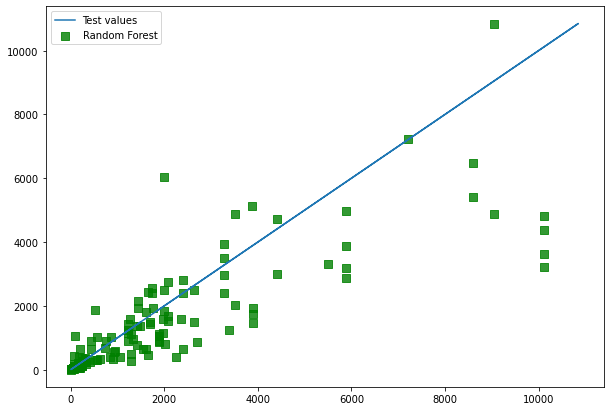

In [62]:
rfr_mae    = mean_absolute_error(y_test, rfr_y_pred)
rfr_mse    = mean_squared_error(y_test, rfr_y_pred)
rfr_rmse   = np.sqrt(mean_squared_error(y_test, rfr_y_pred))
rfr_r_sqrd = r2_score(y_test, rfr_y_pred)

# Dispersão entre y_test e rfr_y_pred
plt.figure(figsize=(10,7))
plt.plot(y_test,y_test, label='Test values')
plt.scatter(rfr_y_pred, y_test, c='green', label="Random Forest", marker='s', s=50, alpha=0.8)
plt.legend()

print(f"Mean Absolute Error   : {rfr_mae:.2f}")
print(f"Mean Squared Error    : {rfr_mse:.2f}")
print(f"Root Mean Square Error: {rfr_rmse:.2f}")
print(f"R-Squared             : {rfr_r_sqrd:.2f}")

### XGBoost

**Carregamendo dos dados em _'DMatrices'_**

In [30]:
d_train = xgb.DMatrix(X_train, label=y_train)
d_test  = xgb.DMatrix(X_test, label=y_test)

**Criação da Pipeline**

In [31]:
xgb_pipeline = Pipeline([('scaler', StandardScaler()),
                         ('XGB', XGBRegressor(random_state=42))])

**Ajuste de Hiperparâmetro**

In [32]:
# fonte: https://towardsdatascience.com/from-zero-to-hero-in-xgboost-tuning-e48b59bfaf58

xgb_rscv_hyperparameters = {'XGB__learning_rate': [0.01, 0.10, 0.20, 0.30, 0.50, 1.0],
                            'XGB__max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                            'XGB__subsample': [0.2, 0.4, 0.5, 0.6, 0.7],
                            'XGB__colsample_bytree': [0.3, 0.6, 0.8, 1.0],
                            'XGB__n_estimators': [100, 250, 500, 1000],
                            'XGB__objective': ['reg:squarederror'],
                            'XGB__gamma': [0.0, 0.1, 0.3, 0.5, 1, 1.5, 2],
                            'XGB__alpha':[0, 0.5, 1],
                            'XGB__lambda': [1, 1.5, 2, 3, 4.5]}

xgb_rscv = RandomizedSearchCV(xgb_pipeline,
                              n_iter=100,
                              param_distributions=xgb_rscv_hyperparameters,
                              cv=tscv,
                              scoring='neg_root_mean_squared_error',
                              n_jobs=10)

In [33]:
xgb_rscv_result = xgb_rscv.fit(X_train, y_train)

print("Best Score: ", xgb_rscv_result.best_score_)
print("Best Parameters:\n", json.dumps(xgb_rscv_result.best_params_, indent=2))

Best Score:  -850.6898001492849
Best Parameters:
 {
  "XGB__subsample": 0.7,
  "XGB__objective": "reg:squarederror",
  "XGB__n_estimators": 1000,
  "XGB__max_depth": 8,
  "XGB__learning_rate": 0.2,
  "XGB__lambda": 1,
  "XGB__gamma": 1.5,
  "XGB__colsample_bytree": 0.6,
  "XGB__alpha": 1
}


In [34]:
xgb_gscv_hyperparameters = {'XGB__learning_rate': [0.001, 0.20, 0.40],
                            'XGB__max_depth': [7, 15, 29],
                            'XGB__subsample': [0.2, 0.5, 0.7],
                            'XGB__colsample_bytree': [0.3, 0.6, 0.9],
                            'XGB__n_estimators': [500, 1000, 2000],
                            'XGB__objective': ['reg:squarederror'],
                            'XGB__gamma': [0.0, 0.3, 1],
                            'XGB__alpha':[0, 0.5, 1],
                            'XGB__lambda': [2, 3, 4]}

xgb_gscv = GridSearchCV(xgb_pipeline,
                        param_grid=xgb_gscv_hyperparameters,
                        cv=tscv,
                        scoring='neg_root_mean_squared_error',
                        n_jobs=5)

In [0]:

xgb_gscv_result = xgb_gscv.fit(X_train, y_train)

print("Best Score: ", xgb_gscv_result.best_score_)
print("Best Parameters:\n", json.dumps(xgb_gscv_result.best_params_, indent=2))

Best Score:  -847.2830920673343
Best Parameters:
 {
  "XGB__alpha": 0.5,
  "XGB__colsample_bytree": 0.6,
  "XGB__gamma": 1,
  "XGB__lambda": 3,
  "XGB__learning_rate": 0.2,
  "XGB__max_depth": 29,
  "XGB__n_estimators": 2000,
  "XGB__objective": "reg:squarederror",
  "XGB__subsample": 0.7
}


**Aplicação do Modelo**

In [36]:
xgb_best_estimator = xgb_gscv_result.best_estimator_
xgb_best_estimator.fit(X_train, y_train)
xgb_y_pred = xgb_best_estimator.predict(X_test)
xgb_y_pred

array([ 1.56871826e+03,  1.04087427e+03,  3.32837319e+00,  1.76006332e+02,
        1.62112671e+03,  2.41412280e+03,  3.08886401e+03,  5.39710156e+03,
        2.79741309e+03,  9.94981408e-01,  1.12212646e+02,  3.03502124e+03,
        6.51788281e+03,  6.03555273e+03,  4.16152051e+03,  2.04219775e+03,
        2.63364655e+02,  5.81150131e+01,  3.64965869e+03,  6.08440723e+03,
        1.99774255e+03,  1.42366870e+03,  1.66000903e+03,  2.38712341e+02,
        1.90674744e+01,  2.10835986e+03,  4.00189502e+03,  1.58260071e+03,
        2.44524121e+03,  2.24877930e+02,  1.92468529e+01,  5.58142395e+01,
        1.76729236e+03,  1.81874524e+03,  1.53017322e+03,  1.02758121e+00,
        2.74398689e+01,  4.58999519e+01,  9.58804016e+01,  2.90686646e+03,
        4.54652490e+03,  2.27993872e+03,  1.41217383e+03,  1.26657373e+03,
        2.86281372e+02,  1.04852745e+02,  1.00939758e+02,  1.90160535e+03,
        2.32701025e+03,  1.72705139e+02,  3.47764526e+02,  5.41556592e+03,
        1.53962036e+03,  

**Avaliação do Modelo**

Mean Absolute Error   : 589.77
Mean Squared Error    : 865668.67
Root Mean Square Error: 930.41
R-Squared             : 0.72


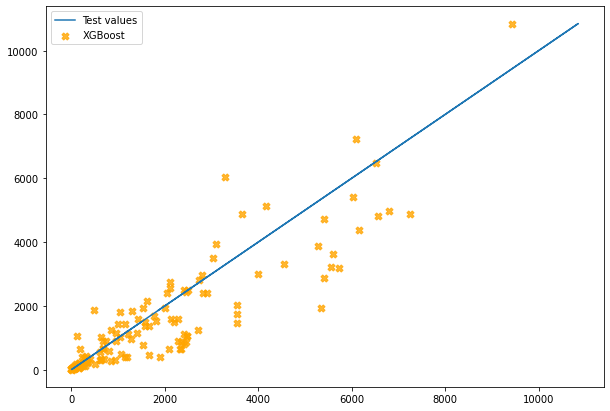

In [88]:
xgb_mae    = mean_absolute_error(y_test, xgb_y_pred)
xgb_mse    = mean_squared_error(y_test, xgb_y_pred)
xgb_rmse   = np.sqrt(mean_squared_error(y_test, xgb_y_pred))
xgb_r_sqrd = r2_score(y_test, xgb_y_pred)

# Dispersão entre y_test e xgb_y_pred
plt.figure(figsize=(10,7))
plt.plot(y_test,y_test, label='Test values')
plt.scatter(xgb_y_pred, y_test, c='orange', label="XGBoost", marker='X', s=50, alpha=0.8)
plt.legend()


print(f"Mean Absolute Error   : {xgb_mae:.2f}")
print(f"Mean Squared Error    : {xgb_mse:.2f}")
print(f"Root Mean Square Error: {xgb_rmse:.2f}")
print(f"R-Squared             : {xgb_r_sqrd:.2f}")

## Análise Comparativa


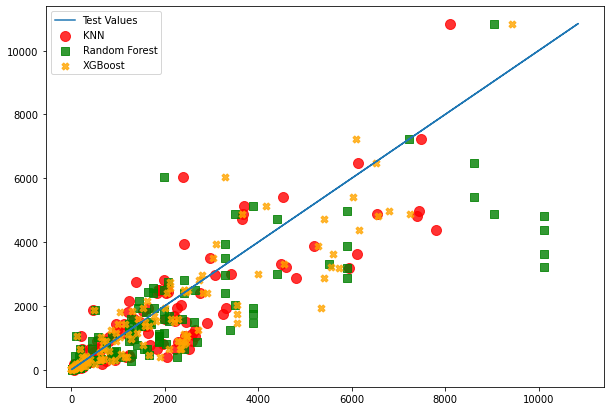

<Figure size 432x288 with 0 Axes>

In [85]:
plt.figure(figsize=(10,7))
plt.plot(y_test, y_test, label="Test Values")
plt.scatter(knn_y_pred, y_test, c='red', label="KNN", s=100, alpha=0.8)
plt.scatter(rfr_y_pred, y_test, c='green', label="Random Forest", marker='s', s=50, alpha=0.8)
plt.scatter(xgb_y_pred, y_test, c='orange', label="XGBoost", marker='X', s=50, alpha=0.8)
plt.legend()
plt.show()